## Importing required Libraries

In [1]:
# basic python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# data preprocessing
from sklearn.preprocessing import StandardScaler

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

# datasplitting
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.model_selection import train_test_split

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV         

# model evaluation metrics
from sklearn.metrics import roc_auc_score, auc, roc_curve, plot_roc_curve, confusion_matrix, f1_score, accuracy_score

## Loading the Data

In [2]:
pd.set_option('display.max_rows',13)
pd.set_option('display.max_columns',None)

In [3]:
dataset=pd.read_csv("Existing_Base.csv")

In [4]:
dataset  # 10155 rows and 32 columns

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,1,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,1972,HTV,NP4 9HS,NP4,148.44,142.95,0.00,81.96,0.00,29.99,0.00,61.95,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,2,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,1998,Granada,M41 0QH,M41,0.00,74.98,0.00,25.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,3,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,1996,Tyne Tees,NE30 1JZ,NE30,0.00,166.44,20.99,291.37,11.48,166.94,0.00,15.99,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,5,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,1997,Central,HR9 7RJ,HR9,0.00,0.00,0.00,20.49,0.00,39.46,0.00,45.44,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,6,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,1995,Scottish TV,KA10 7LS,KA10,73.45,57.96,0.00,177.42,41.95,39.47,10.97,212.84,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,11512,1,45-50,Partner,Secretarial/Admin,Manual Worker,Own Home,"<30,000, >=27,500",No,No,1972,Carlton,SM4 5RF,SM4,0.00,0.00,0.00,29.97,6.49,0.00,8.99,7.49,4.49,0.00,0.00,2,Female,South East,7.29,3.50,9.57,10.23
10151,11513,Zero,45-50,Partner,Manual Worker,Manual Worker,Rent from Council/HA,"<25,000, >=22,500",No,No,1988,Meridian,RG14 7PA,RG14,0.00,110.95,0.00,200.41,0.00,2.99,0.00,14.99,0.00,0.00,0.00,2,Female,South East,62.27,3.00,36.40,102.62
10152,11514,2,41-45,Partner,Housewife,Professional,Own Home,">=35,000",No,No,1992,Central,OX15 0PU,OX15,124.93,0.00,54.48,0.00,84.42,0.00,0.00,0.00,0.00,0.00,0.00,2,Female,South East,52.77,0.00,14.07,76.18
10153,11516,Zero,51-55,Partner,Other,Manual Worker,Own Home,"<10,000, >= 8,000",No,Yes,1970,Carlton,CM15 0LU,CM15,0.00,35.98,0.00,0.00,0.00,0.00,0.00,9.98,0.00,7.98,0.00,2,Female,South East,7.20,2.99,1.66,4.79


## Exploratory Data Analysis and Data Preprocessing

In [5]:
dataset.describe()

,REF_NO,year_last_moved,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
count,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000
mean,5770.830822,1968.376366,23.441757,46.417760,27.579851,66.242131,19.142050,32.084965,26.006003,42.339698,6.112071,4.482002,19.162772,1.893058,36.564886,21.698694,31.988647,90.460237
std,3324.837813,180.202242,50.872127,78.477609,53.952550,95.545316,32.451856,45.486614,84.275743,63.898899,12.833675,9.982641,89.666263,0.309055,42.270530,31.893841,39.106347,107.265475
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-78.430000
25%,2903.500000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8.230000,4.670000,8.740000,26.605000
50%,5770.000000,1988.000000,0.000000,17.960000,0.000000,31.980000,0.510000,14.990000,0.000000,23.480000,0.000000,0.000000,0.000000,2.000000,23.980000,12.980000,21.340000,66.200000
75%,8665.500000,1994.000000,23.980000,65.385000,34.990000,94.390000,27.470000,46.480000,21.480000,59.555000,5.975000,4.490000,7.980000,2.000000,50.790000,28.300000,42.980000,125.935000
max,11518.000000,1999.000000,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.930000,2561.270000,156.870000,162.350000,4306.420000,2.000000,1231.090000,1279.100000,1771.160000,4283.560000


In [6]:
dataset.info()

# INSIGHTS
# csv file size is 1.86 MB; Python memory usage is 2.5+ MB
# no missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           10155 non-null  int64  
 1   children                         10155 non-null  object 
 2   age_band                         10155 non-null  object 
 3   status                           10155 non-null  object 
 4   occupation                       10155 non-null  object 
 5   occupation_partner               10155 non-null  object 
 6   home_status                      10155 non-null  object 
 7   family_income                    10155 non-null  object 
 8   self_employed                    10155 non-null  object 
 9   self_employed_partner            10155 non-null  object 
 10  year_last_moved                  10155 non-null  int64  
 11  TVarea                           10155 non-null  object 
 12  post_code         

### Target column

In [7]:
dataset["Revenue Grid"].unique() # This is the target column which our model has to predict

array([1, 2], dtype=int64)

In [8]:
## Preprocessing step 1

# Target column has values - 1 (eligible for discount) and 2 (not eligible for discount) 
# Since its a classification problem, converting target column into 0s and 1s 
dataset.loc[dataset['Revenue Grid']==2,'Revenue Grid'] = 0  # this replaces all the 2's (not eligible) with 0

In [9]:
dataset["Revenue Grid"].value_counts()

0    9069
1    1086
Name: Revenue Grid, dtype: int64

In [10]:
dataset["Revenue Grid"].value_counts(normalize=True)

0    0.893058
1    0.106942
Name: Revenue Grid, dtype: float64

In [11]:
np.mean(dataset["Revenue Grid"])

0.1069423929098966

### Analysing the numeric columns in the datatset

In [12]:
numeric_columns=dataset.select_dtypes(np.number).columns
numeric_columns

Index(['REF_NO', 'year_last_moved', 'Average Credit Card Transaction',
       'Balance Transfer', 'Term Deposit', 'Life Insurance',
       'Medical Insurance', 'Average A/C Balance', 'Personal Loan',
       'Investment in Mutual Fund', 'Investment Tax Saving Bond', 'Home Loan',
       'Online Purchase Amount', 'Revenue Grid', 'Investment in Commudity',
       'Investment in Equity', 'Investment in Derivative',
       'Portfolio Balance'],
      dtype='object')

In [13]:
len(numeric_columns) # we have 18 numeric columns

18

In [14]:
dataset.index  # x axis for the scatter plot below

RangeIndex(start=0, stop=10155, step=1)

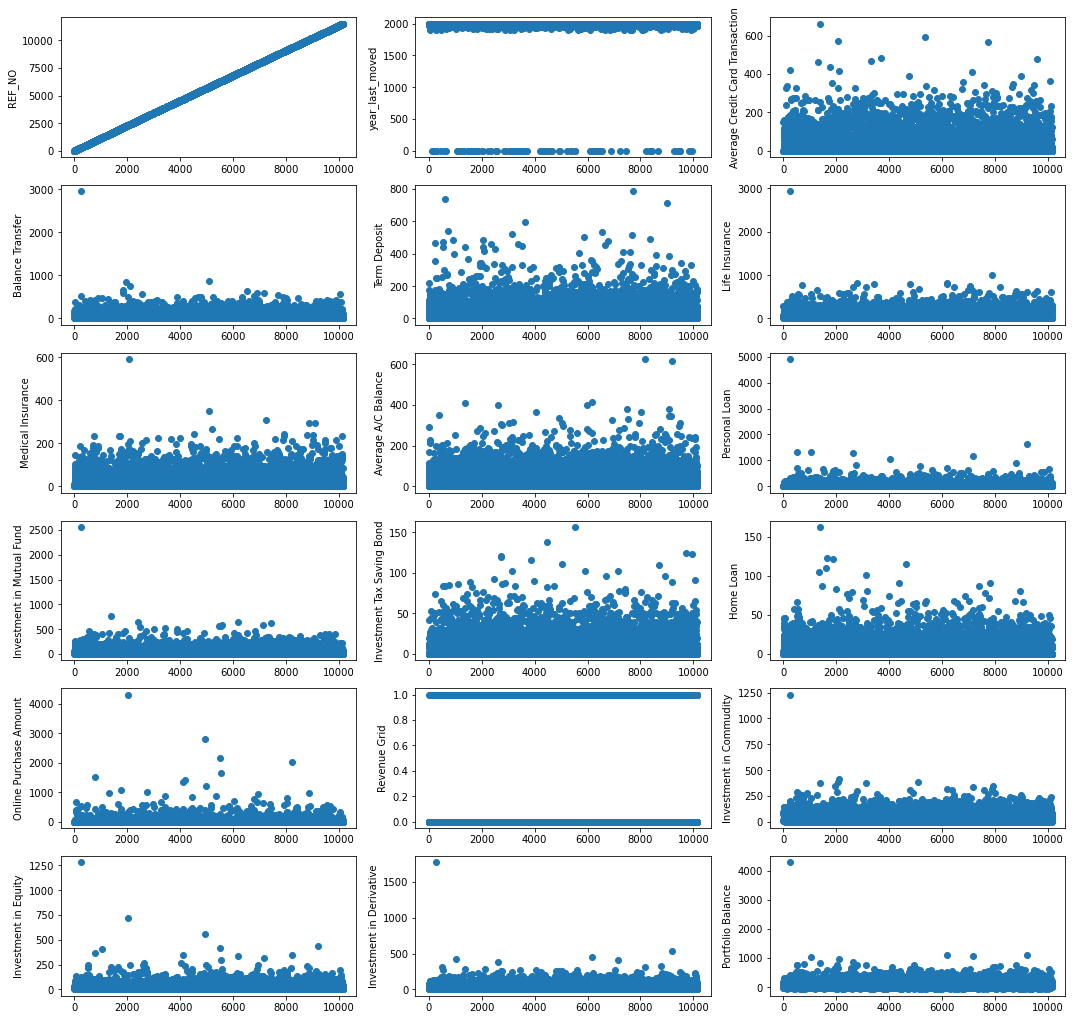

In [15]:
no_of_rows=6; no_of_cols = 3
i=0

fig,ax=plt.subplots(no_of_rows, no_of_cols,figsize = (18,18))
for row in range(no_of_rows):
    for col in range(no_of_cols):
        ax[row][col].scatter(dataset.index,dataset.loc[:,numeric_columns[i]])
        ax[row][col].set_ylabel(numeric_columns[i])
        i=i+1
        
# INSIGHTS
# REF_NO is same as index, adding no value to prediction; this column can be dropped
# year_last_moved has some rows as 0
# There is one outlier in Balance Transfer, Life Insurance, Personal Loan, Investment in Mutual Fund, Investment in Commudity, 
   # Investment in Equity, Investment in Derivative, Portfolio Balance columns, needs to check if this is the same customer in 
   # all these cases.
# Capping could be done to reduce the impact of outliers.
# Scaling has to be done before passing the data to model.

In [16]:
## Preprocessing step 2

# taking dataset_copy as a backup of the dataset
dataset_copy=dataset.copy()  # deep=True by default

In [17]:
dataset_copy.shape

(10155, 32)

In [18]:
## Preprocessing step 3

# removing REF_NO column
dataset.drop(['REF_NO'],axis=1,inplace=True)  

In [19]:
dataset.shape  # one column removed

(10155, 31)

In [20]:
# Analyze the year_last_moved column whether it can be dropped
print(dataset.year_last_moved.nunique())

95


In [21]:
# only 84 out of 10155 rows have year_last_moved=0
dataset[dataset.year_last_moved==0]['Revenue Grid'].value_counts()

0    80
1     4
Name: Revenue Grid, dtype: int64

In [22]:
# Revenue Grid distribution on year_last_moved==0 columns 
dataset[dataset.year_last_moved==0]['Revenue Grid'].value_counts(normalize=True) 

0    0.952381
1    0.047619
Name: Revenue Grid, dtype: float64

In [23]:
# Revenue Grid distribution on year_last_moved!=0 columns 
dataset[dataset.year_last_moved!=0]['Revenue Grid'].value_counts(normalize=True)

0    0.892563
1    0.107437
Name: Revenue Grid, dtype: float64

In [24]:
# INSIGHTS
# not dropping year_last_moved column now, as there is a difference in the Revenue Grid distribution for 
        # dataset.year_last_moved==0 and dataset.year_last_moved!=0 cases

### Outlier Analysis

In [25]:
# checking the outlier in Balance Transfer, Life Insurance, Personal Loan, Investment in Mutual Fund, Investment in Commudity, 
# Investment in Equity, Investment in Derivative, Portfolio Balance columns, to see if its the same customer
dataset[dataset['Portfolio Balance']>4000]

# INSIGHTS
# Its the same Customer
# This row can be removed, as its an outlier

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
250,1,41-45,Partner,Professional,Professional,Own Home,">=35,000",No,No,1988,Tyne Tees,NE38 8SF,NE38,0.0,2951.76,251.33,2930.41,21.96,197.9,4905.93,2561.27,9.48,0.0,0.0,0,Male,North,1231.09,1279.1,1771.16,4283.56


### Removing the outlier

In [26]:
dataset.shape

(10155, 31)

In [27]:
## Preprocessing step 4

# using .copy() solves the SettingWithCopyWarning in Preprocessing step 6
dataset=dataset[~(dataset['Portfolio Balance']>4000)].copy()
dataset.shape

(10154, 31)

### Capping these columns to reduce the impact of outliers.

In [28]:
## Preprocessing step 5

# choosing these columns to cap - Average Credit Card Transaction, Term Deposit, 'Medical Insurance', Average A/C Balance, 
         # Personal Loan, Investment Tax Saving Bond, Home Loan, Online Purchase Amount, Investment in Equity 
    
cap_columns=['Average Credit Card Transaction', 'Term Deposit', 'Medical Insurance', 'Average A/C Balance', 'Personal Loan',
         'Investment Tax Saving Bond', 'Home Loan', 'Online Purchase Amount', 'Investment in Equity']

# comparing max_value of each column with its 95th percentile value
for i in cap_columns:
    max_val= np.max(dataset[i])
    percentile_95_val = np.quantile(dataset[i],0.95)   # finding the 95th percentile value
    print(f'{i}: {max_val} {round(percentile_95_val,2)}')  

Average Credit Card Transaction: 662.26 130.59
Term Deposit: 784.82 126.6
Medical Insurance: 591.04 82.44
Average A/C Balance: 626.24 120.32
Personal Loan: 1645.38 134.17
Investment Tax Saving Bond: 156.87 32.55
Home Loan: 162.35 24.46
Online Purchase Amount: 4306.42 93.45
Investment in Equity: 717.74 69.72


In [29]:
# verifying the 95th percentile values
dataset[cap_columns].describe(percentiles=[.95,.99])

,Average Credit Card Transaction,Term Deposit,Medical Insurance,Average A/C Balance,Personal Loan,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Investment in Equity
count,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000
mean,23.444065,27.557816,19.141773,32.068635,25.525412,6.111739,4.482443,19.164659,21.574861
std,50.874101,53.909488,32.453442,45.459075,68.973832,12.834263,9.983033,89.670477,29.352661
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.510000,14.990000,0.000000,0.000000,0.000000,0.000000,12.980000
95%,130.591500,126.601500,82.440500,120.317000,134.174500,32.553500,24.460000,93.453500,69.717500
99%,241.959400,248.822400,148.659100,195.865300,307.541000,57.314000,44.739900,309.257600,132.717900
max,662.260000,784.820000,591.040000,626.240000,1645.380000,156.870000,162.350000,4306.420000,717.740000


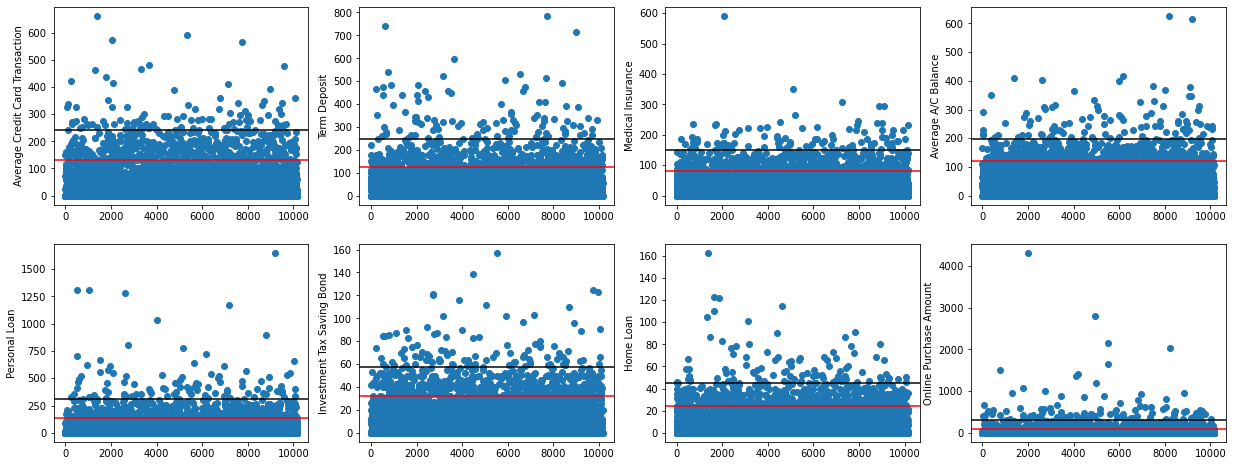

In [30]:
# comparing 95th and 99th percentile values for cap_columns
no_of_rows=2; no_of_cols = 4
i=0
fig,ax=plt.subplots(no_of_rows, no_of_cols,figsize = (21,8))
for row in range(no_of_rows):
    for col in range(no_of_cols):
        ax[row][col].scatter(dataset.index,dataset.loc[:,cap_columns[i]])
        ax[row][col].set_ylabel(cap_columns[i])
        ax[row][col].axhline(y=np.quantile(dataset[cap_columns[i]],0.99), alpha=5, color="black") # 99th percentile line
        ax[row][col].axhline(y=np.quantile(dataset[cap_columns[i]],0.95), alpha=5, color="red") # 95th percentile line        
        i=i+1
        
# INSIGHTS
# 99th percentile looks like a better option

In [31]:
# another option for capping - instead of taking percentile, compute the Upper Control Limit using the formula: UCL = Q3 + 1.5 * IQR

print("max_val, 99th percentile, UCL")
print("-----------------------------")

for column in cap_columns:
    max_val= np.max(dataset[column])
    percentile_99_val= np.quantile(dataset[column],0.99)
    Q1 = np.quantile(dataset[column],0.25)   # finding the 25th percentile value
    Q3 = np.quantile(dataset[column],0.75)   # finding the 75th percentile value
    UCL = Q3 + 1.5 * (Q3 - Q1)  # UCL = Q3 + 1.5 * IQR
    print(max_val, round(percentile_99_val,2), round(UCL,2)) 

# INSIGHT
# UCL is much lesser than 99th percentile value, a better approach is capping to 99th percentile.

max_val, 99th percentile, UCL
-----------------------------
662.26 241.96 59.95
784.82 248.82 87.47
591.04 148.66 68.68
626.24 195.87 116.19
1645.38 307.54 53.7
156.87 57.31 14.92
162.35 44.74 11.23
4306.42 309.26 19.95
717.74 132.72 63.74


In [32]:
## Preprocessing step 6

# Capping the numeric columns to 99th percentile 
for column in cap_columns:  
    
    # finding the 99th percentile value
    percentile_99_val = np.quantile(dataset[column],0.99)  
    
    # replace all the values greater than 99th percentile with the 99th percentile value
    dataset.loc[dataset[column]>percentile_99_val, column] = percentile_99_val  

In [33]:
# confirming that the max_value of each column is its 99th percentile value
for i in cap_columns:
    max_val= np.max(dataset[i])
    print(max_val) 

# INSIGHT
# max_value is updated to reflect its previous 99th percentile value

241.9594
248.8223999999987
148.65909999999965
195.86529999999934
307.5409999999972
57.313999999999865
44.73989999999989
309.2575999999947
132.71789999999834


### Analysing the categorical columns in the datatset

In [34]:
# getting only the categorical columns
dataset.select_dtypes(exclude=np.number).columns

Index(['children', 'age_band', 'status', 'occupation', 'occupation_partner',
       'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'TVarea', 'post_code', 'post_area', 'gender',
       'region'],
      dtype='object')

In [35]:
# viewing the dataset with only categorical columns
dataset.select_dtypes(exclude=np.number).sample(3)

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,post_code,post_area,gender,region
7403,Zero,71+,Partner,Retired,Retired,Own Home,"< 8,000, >= 4,000",No,No,Yorkshire,WF12 0EW,WF12,Male,Unknown
6415,1,26-30,Partner,Housewife,Professional,Own Home,">=35,000",No,No,Scottish TV,G74 4TF,G74,Female,Scotland
4638,Zero,55-60,Partner,Secretarial/Admin,Manual Worker,Own Home,"<27,500, >=25,000",No,No,TV South West,DT4 0SU,DT4,Female,South West


#### Analysing children column

In [36]:
dataset.children.nunique() # 5 unique values in children column

5

In [37]:
dataset.children.unique()

array(['Zero', '1', '2', '3', '4+'], dtype=object)

In [38]:
dataset.children.value_counts(normalize=True)

# INSIGHTS
# Since 4+ is only 0.18% of the entire customers, it can be combined to children=3 and rename children=3 as 3+

Zero    0.611385
1       0.181899
2       0.158263
3       0.046583
4+      0.001871
Name: children, dtype: float64

In [39]:
## Preprocessing step 7

dataset.loc[dataset.children=='4+',"children"]="3+"
dataset.loc[dataset.children=='3',"children"]="3+"
dataset.children.value_counts(normalize=True)

Zero    0.611385
1       0.181899
2       0.158263
3+      0.048454
Name: children, dtype: float64

In [40]:
## Preprocessing step 8

# one hot encoding dataset.children
children_data = pd.get_dummies(dataset['children'],drop_first =True,prefix ='chidren')
dataset.drop(['children'],axis=1,inplace=True)
dataset = pd.concat([dataset,children_data],axis=1)
dataset.columns # children column is removed and its dummy variables are added

Index(['age_band', 'status', 'occupation', 'occupation_partner', 'home_status',
       'family_income', 'self_employed', 'self_employed_partner',
       'year_last_moved', 'TVarea', 'post_code', 'post_area',
       'Average Credit Card Transaction', 'Balance Transfer', 'Term Deposit',
       'Life Insurance', 'Medical Insurance', 'Average A/C Balance',
       'Personal Loan', 'Investment in Mutual Fund',
       'Investment Tax Saving Bond', 'Home Loan', 'Online Purchase Amount',
       'Revenue Grid', 'gender', 'region', 'Investment in Commudity',
       'Investment in Equity', 'Investment in Derivative', 'Portfolio Balance',
       'chidren_2', 'chidren_3+', 'chidren_Zero'],
      dtype='object')

#### Analysing age_band column

In [41]:
dataset.age_band.nunique()

13

In [42]:
dataset.age_band.value_counts()

45-50      1359
36-40      1134
41-45      1111
31-35      1061
51-55      1052
55-60      1047
26-30       927
61-65       881
65-70       598
22-25       456
71+         410
18-21        63
Unknown      55
Name: age_band, dtype: int64

In [43]:
# normalize=True returns the relative frequencies of the unique values
dataset.age_band.value_counts(normalize=True)

45-50      0.133839
36-40      0.111680
41-45      0.109415
31-35      0.104491
51-55      0.103604
55-60      0.103112
26-30      0.091294
61-65      0.086764
65-70      0.058893
22-25      0.044908
71+        0.040378
18-21      0.006204
Unknown    0.005417
Name: age_band, dtype: float64

In [44]:
## Preprocessing step 9

age_band_dummies = pd.get_dummies(dataset['age_band'],drop_first=True,prefix = 'age_band')
dataset.drop(['age_band'],axis=1,inplace=True)
dataset = pd.concat([dataset,age_band_dummies],axis=1)
dataset.columns # age_band column is removed and its dummy variables are added

Index(['status', 'occupation', 'occupation_partner', 'home_status',
       'family_income', 'self_employed', 'self_employed_partner',
       'year_last_moved', 'TVarea', 'post_code', 'post_area',
       'Average Credit Card Transaction', 'Balance Transfer', 'Term Deposit',
       'Life Insurance', 'Medical Insurance', 'Average A/C Balance',
       'Personal Loan', 'Investment in Mutual Fund',
       'Investment Tax Saving Bond', 'Home Loan', 'Online Purchase Amount',
       'Revenue Grid', 'gender', 'region', 'Investment in Commudity',
       'Investment in Equity', 'Investment in Derivative', 'Portfolio Balance',
       'chidren_2', 'chidren_3+', 'chidren_Zero', 'age_band_22-25',
       'age_band_26-30', 'age_band_31-35', 'age_band_36-40', 'age_band_41-45',
       'age_band_45-50', 'age_band_51-55', 'age_band_55-60', 'age_band_61-65',
       'age_band_65-70', 'age_band_71+', 'age_band_Unknown'],
      dtype='object')

#### Analysing Status column

In [45]:
dataset.status.value_counts()

Partner                 7708
Single/Never Married    1101
Divorced/Separated       679
Widowed                  618
Unknown                   48
Name: status, dtype: int64

In [46]:
dataset.status.value_counts(normalize=True)

Partner                 0.759110
Single/Never Married    0.108430
Divorced/Separated      0.066870
Widowed                 0.060863
Unknown                 0.004727
Name: status, dtype: float64

In [47]:
## Preprocessing step 10

# drop_first=True generates 4 dummies out of 5 unique values,
                # by removing the first value (Divorced/Separated in this case)
status_dummies = pd.get_dummies(dataset['status'], drop_first=True, prefix = 'status')

dataset.drop(['status'],axis=1,inplace=True)
dataset = pd.concat([dataset,status_dummies],axis=1)
dataset.columns

Index(['occupation', 'occupation_partner', 'home_status', 'family_income',
       'self_employed', 'self_employed_partner', 'year_last_moved', 'TVarea',
       'post_code', 'post_area', 'Average Credit Card Transaction',
       'Balance Transfer', 'Term Deposit', 'Life Insurance',
       'Medical Insurance', 'Average A/C Balance', 'Personal Loan',
       'Investment in Mutual Fund', 'Investment Tax Saving Bond', 'Home Loan',
       'Online Purchase Amount', 'Revenue Grid', 'gender', 'region',
       'Investment in Commudity', 'Investment in Equity',
       'Investment in Derivative', 'Portfolio Balance', 'chidren_2',
       'chidren_3+', 'chidren_Zero', 'age_band_22-25', 'age_band_26-30',
       'age_band_31-35', 'age_band_36-40', 'age_band_41-45', 'age_band_45-50',
       'age_band_51-55', 'age_band_55-60', 'age_band_61-65', 'age_band_65-70',
       'age_band_71+', 'age_band_Unknown', 'status_Partner',
       'status_Single/Never Married', 'status_Unknown', 'status_Widowed'],
      dt

#### Analysing occupation column

In [48]:
dataset.occupation.value_counts()

# INSIGHTS
# can 'Unknown' and 'Other' categories be combined?
# 'Other' means, none of the mentioned categories.
# 'Unknown' means, we don't have information about their occupation.
# So leaving it as is.

Professional         2448
Retired              2206
Secretarial/Admin    1797
Housewife            1255
Business Manager      732
Unknown               567
Manual Worker         556
Other                 537
Student                56
Name: occupation, dtype: int64

In [49]:
## Preprocessing step 11

occupation_dummies = pd.get_dummies(dataset['occupation'],drop_first=True,prefix = 'occupation')
dataset.drop(['occupation'],axis=1,inplace=True)

dataset = pd.concat([dataset,occupation_dummies],axis=1)
dataset.columns # occupation column is removed and its dummy variables are added

Index(['occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average Credit Card Transaction', 'Balance Transfer',
       'Term Deposit', 'Life Insurance', 'Medical Insurance',
       'Average A/C Balance', 'Personal Loan', 'Investment in Mutual Fund',
       'Investment Tax Saving Bond', 'Home Loan', 'Online Purchase Amount',
       'Revenue Grid', 'gender', 'region', 'Investment in Commudity',
       'Investment in Equity', 'Investment in Derivative', 'Portfolio Balance',
       'chidren_2', 'chidren_3+', 'chidren_Zero', 'age_band_22-25',
       'age_band_26-30', 'age_band_31-35', 'age_band_36-40', 'age_band_41-45',
       'age_band_45-50', 'age_band_51-55', 'age_band_55-60', 'age_band_61-65',
       'age_band_65-70', 'age_band_71+', 'age_band_Unknown', 'status_Partner',
       'status_Single/Never Married', 'status_Unknown', 'status_Widowed',
       'occupation_Housewife',

#### Analysing occupation_partner column

In [50]:
dataset.occupation_partner.value_counts()

# INSIGHTS
# can 'Unknown' and 'Other' categories be combined?
# 'Other' means, none of the mentioned categories.
# 'Unknown' maybe referring to either Customers who don't have partners or we don't have information about 
       # their partner's occupation. leaving it as is for now.

Unknown              2394
Professional         2050
Retired              1936
Manual Worker        1508
Business Manager      737
Secretarial/Admin     662
Housewife             527
Other                 324
Student                16
Name: occupation_partner, dtype: int64

In [51]:
## Preprocessing step 12

occupation_partner_dummies = pd.get_dummies(dataset['occupation_partner'],drop_first=True,prefix = 'occupation_partner')
dataset.drop(['occupation_partner'],axis=1,inplace=True)

dataset = pd.concat([dataset,occupation_partner_dummies],axis=1)
dataset.columns  # occupation_partner column is removed and its dummy variables are added.

Index(['home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average Credit Card Transaction', 'Balance Transfer',
       'Term Deposit', 'Life Insurance', 'Medical Insurance',
       'Average A/C Balance', 'Personal Loan', 'Investment in Mutual Fund',
       'Investment Tax Saving Bond', 'Home Loan', 'Online Purchase Amount',
       'Revenue Grid', 'gender', 'region', 'Investment in Commudity',
       'Investment in Equity', 'Investment in Derivative', 'Portfolio Balance',
       'chidren_2', 'chidren_3+', 'chidren_Zero', 'age_band_22-25',
       'age_band_26-30', 'age_band_31-35', 'age_band_36-40', 'age_band_41-45',
       'age_band_45-50', 'age_band_51-55', 'age_band_55-60', 'age_band_61-65',
       'age_band_65-70', 'age_band_71+', 'age_band_Unknown', 'status_Partner',
       'status_Single/Never Married', 'status_Unknown', 'status_Widowed',
       'occupation_Housewife', 'occupation_Manual Wo

#### Analysing home_status column

In [52]:
dataset.home_status.value_counts()

Own Home                9412
Rent from Council/HA     322
Rent Privately           261
Live in Parental Hom     109
Unclassified              50
Name: home_status, dtype: int64

In [53]:
dataset.home_status.value_counts(normalize=True)

Own Home                0.926925
Rent from Council/HA    0.031712
Rent Privately          0.025704
Live in Parental Hom    0.010735
Unclassified            0.004924
Name: home_status, dtype: float64

In [54]:
## Preprocessing step 13

home_status_dummies = pd.get_dummies(dataset['home_status'],drop_first=True,prefix = 'home_status')
dataset.drop(['home_status'],axis=1,inplace=True)

dataset = pd.concat([dataset,home_status_dummies],axis=1)
dataset.columns  # home_status column is removed and its dummy variables are added.

Index(['family_income', 'self_employed', 'self_employed_partner',
       'year_last_moved', 'TVarea', 'post_code', 'post_area',
       'Average Credit Card Transaction', 'Balance Transfer', 'Term Deposit',
       'Life Insurance', 'Medical Insurance', 'Average A/C Balance',
       'Personal Loan', 'Investment in Mutual Fund',
       'Investment Tax Saving Bond', 'Home Loan', 'Online Purchase Amount',
       'Revenue Grid', 'gender', 'region', 'Investment in Commudity',
       'Investment in Equity', 'Investment in Derivative', 'Portfolio Balance',
       'chidren_2', 'chidren_3+', 'chidren_Zero', 'age_band_22-25',
       'age_band_26-30', 'age_band_31-35', 'age_band_36-40', 'age_band_41-45',
       'age_band_45-50', 'age_band_51-55', 'age_band_55-60', 'age_band_61-65',
       'age_band_65-70', 'age_band_71+', 'age_band_Unknown', 'status_Partner',
       'status_Single/Never Married', 'status_Unknown', 'status_Widowed',
       'occupation_Housewife', 'occupation_Manual Worker', 'occupat

#### Analysing family_income column

In [55]:
dataset.family_income.value_counts()

>=35,000             2516
<27,500, >=25,000    1227
<30,000, >=27,500     994
<25,000, >=22,500     833
<20,000, >=17,500     683
<12,500, >=10,000     677
<17,500, >=15,000     634
<15,000, >=12,500     629
<22,500, >=20,000     590
<10,000, >= 8,000     563
< 8,000, >= 4,000     402
< 4,000               278
Unknown               128
Name: family_income, dtype: int64

In [56]:
## Preprocessing step 14

# income is used instead of family income 
income_dummies = pd.get_dummies(dataset['family_income'],drop_first=True,prefix = 'income')
dataset.drop(['family_income'],axis=1,inplace=True)
dataset = pd.concat([dataset,income_dummies],axis=1)

In [57]:
dataset.columns

Index(['self_employed', 'self_employed_partner', 'year_last_moved', 'TVarea',
       'post_code', 'post_area', 'Average Credit Card Transaction',
       'Balance Transfer', 'Term Deposit', 'Life Insurance',
       'Medical Insurance', 'Average A/C Balance', 'Personal Loan',
       'Investment in Mutual Fund', 'Investment Tax Saving Bond', 'Home Loan',
       'Online Purchase Amount', 'Revenue Grid', 'gender', 'region',
       'Investment in Commudity', 'Investment in Equity',
       'Investment in Derivative', 'Portfolio Balance', 'chidren_2',
       'chidren_3+', 'chidren_Zero', 'age_band_22-25', 'age_band_26-30',
       'age_band_31-35', 'age_band_36-40', 'age_band_41-45', 'age_band_45-50',
       'age_band_51-55', 'age_band_55-60', 'age_band_61-65', 'age_band_65-70',
       'age_band_71+', 'age_band_Unknown', 'status_Partner',
       'status_Single/Never Married', 'status_Unknown', 'status_Widowed',
       'occupation_Housewife', 'occupation_Manual Worker', 'occupation_Other',
     

#### Analysing self_employed, self_employed_partner, gender columns

In [58]:
dataset.self_employed.value_counts()

No     9435
Yes     719
Name: self_employed, dtype: int64

In [59]:
dataset.self_employed_partner.value_counts()

No     9025
Yes    1129
Name: self_employed_partner, dtype: int64

In [60]:
dataset.gender.value_counts()

Female     7634
Male       2485
Unknown      35
Name: gender, dtype: int64

In [61]:
## Preprocessing step 15

cols = ['self_employed','self_employed_partner','gender']

for column in cols:
    dummies = pd.get_dummies(dataset[column],drop_first=True,prefix = column)
    dataset.drop(column,axis=1,inplace=True)
    dataset = pd.concat([dataset,dummies],axis=1)

In [62]:
dataset.columns

Index(['year_last_moved', 'TVarea', 'post_code', 'post_area',
       'Average Credit Card Transaction', 'Balance Transfer', 'Term Deposit',
       'Life Insurance', 'Medical Insurance', 'Average A/C Balance',
       'Personal Loan', 'Investment in Mutual Fund',
       'Investment Tax Saving Bond', 'Home Loan', 'Online Purchase Amount',
       'Revenue Grid', 'region', 'Investment in Commudity',
       'Investment in Equity', 'Investment in Derivative', 'Portfolio Balance',
       'chidren_2', 'chidren_3+', 'chidren_Zero', 'age_band_22-25',
       'age_band_26-30', 'age_band_31-35', 'age_band_36-40', 'age_band_41-45',
       'age_band_45-50', 'age_band_51-55', 'age_band_55-60', 'age_band_61-65',
       'age_band_65-70', 'age_band_71+', 'age_band_Unknown', 'status_Partner',
       'status_Single/Never Married', 'status_Unknown', 'status_Widowed',
       'occupation_Housewife', 'occupation_Manual Worker', 'occupation_Other',
       'occupation_Professional', 'occupation_Retired',
       '

#### Analysing TVarea column

In [63]:
dataset.TVarea.nunique()

14

<AxesSubplot:xlabel='TVarea', ylabel='Revenue Grid'>

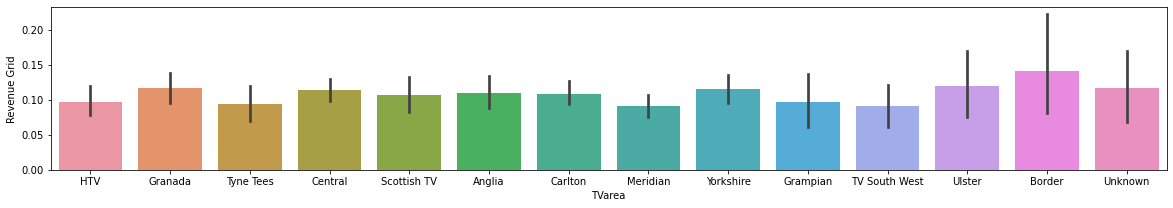

In [64]:
# checking the central tendency (mean) of "Revenue Grid" for different TVarea categories
plt.figure(figsize=(20,3))
sns.barplot(x="TVarea", y="Revenue Grid",data=dataset) 

# INSIGHTS
# Can Customer's TVarea feature influence their trading pattern?
# Not sure, what this feature means.
# Revenue Grid mean values for the different TVarea categories are almost same as 
        # the whole dataset Revenue Grid mean value
# TVarea column may not be a good predictor, can be dropped for now
# will reconsider, if model performance is not good

In [65]:
# checking the Revenue Grid mean values again for different TVarea categories
for i in dataset.TVarea.unique():
    print(i, round(dataset[dataset.TVarea==i]["Revenue Grid"].value_counts(normalize=True)[1],2))

HTV 0.1
Granada 0.12
Tyne Tees 0.09
Central 0.11
Scottish TV 0.11
Anglia 0.11
Carlton 0.11
Meridian 0.09
Yorkshire 0.12
Grampian 0.1
TV South West 0.09
Ulster 0.12
Border 0.14
Unknown 0.12


In [66]:
## Preprocessing step 16

dataset.drop(['TVarea'],axis=1,inplace=True)

#### Analysing post_area column

In [67]:
dataset.post_area.nunique()

# INSIGHTS
# One hot encoding will result in too many columns
# dropping this column now

2039

In [68]:
## Preprocessing step 17

dataset.drop(['post_area'],axis=1,inplace=True)

#### Analysing region column

In [69]:
dataset.region.value_counts()

South East          2100
North West          1896
Unknown             1080
South West           971
West Midlands        820
Scotland             787
East Midlands        771
North                570
Wales                556
East Anglia          423
Northern Ireland     159
Isle of Man           16
Channel Islands        5
Name: region, dtype: int64

In [70]:
## Preprocessing step 18

region_dummies = pd.get_dummies(dataset['region'],drop_first=True,prefix = 'region')
dataset.drop(['region'],axis=1,inplace=True)
dataset = pd.concat([dataset,region_dummies],axis=1)

#### Analysing post_code column

In [71]:
dataset.post_code.nunique()

# INSIGHTS
# dropping this column now as onehot encoding will result in too many columns

10039

In [72]:
## Preprocessing step 19

dataset.drop(['post_code'],axis=1,inplace=True)

In [ ]:
dataset.info()

In [77]:
print('The shape of data after all preprocessing',dataset.shape)

The shape of data after all preprocessing (10154, 84)


## Test Train Split

In [78]:
## Preprocessing step 20

# train_test_split
print("original dataset Revenue Grid mean:", round(dataset["Revenue Grid"].mean(),3))

print("\nafter train_test_split")
train, test = train_test_split(dataset,test_size =0.2)
print(      "train dataset Revenue Grid mean:",round(train["Revenue Grid"].mean(),3))
print("test dataset Revenue Grid mean:", round(test["Revenue Grid"].mean(),3))

# stratified train_test_split
print("\nafter train_test stratified split")
train, test = train_test_split(dataset,test_size =0.2, stratify=dataset["Revenue Grid"])
print(      "train dataset Revenue Grid mean:",round(train["Revenue Grid"].mean(),3))
print("test dataset Revenue Grid mean:", round(test["Revenue Grid"].mean(),3))

##INSIGHTS
# opting for a stratified train_test_split

original dataset Revenue Grid mean: 0.107

after train_test_split
train dataset Revenue Grid mean: 0.107
test dataset Revenue Grid mean: 0.105

after train_test stratified split
train dataset Revenue Grid mean: 0.107
test dataset Revenue Grid mean: 0.107


In [ ]:
train.head() 

## INSIGHTS
# scaling needs to be done
# x,y split is pending

## features/target split

In [ ]:
train.shape # training dataset

In [79]:
## Preprocessing step 21

x_train = train.drop(['Revenue Grid'], axis=1)
y_train = train['Revenue Grid']
x_train.shape

(8123, 83)

In [ ]:
test.shape # testing dataset

In [80]:
## Preprocessing step 22

x_test= test.drop(['Revenue Grid'],axis=1)
y_test = test['Revenue Grid']
x_test.shape

(2031, 83)

## Scaling the data

In [ ]:
numeric_columns # selecting only the numeric columns for scaling, rest of the columns are all onehot encoded

In [81]:
## Preprocessing step 23

numeric_cols_list=list(numeric_columns)
numeric_cols_list.remove('REF_NO') # removing REF_NO from numeric_cols_list, as that column is already dropped
numeric_cols_list.remove('Revenue Grid')  # removing revenue grid from numeric_cols_list, as that is the target variable

In [82]:
## Preprocessing step 24

scaler = StandardScaler() # z-score normalization
x_train[numeric_cols_list] = scaler.fit_transform(x_train[numeric_cols_list]) # Fit to data, then transform it.
x_test[numeric_cols_list] = scaler.transform(x_test[numeric_cols_list])

In [ ]:
x_train.head() # scaled x_train

In [ ]:
x_test.head() # scaled x_test

In [83]:
pd.concat([x_train[x_train["Balance Transfer"]>11],x_test[x_test["Balance Transfer"]>11]],axis=1) 
# some values as high as 11 also present in dataset (after z-scale normalization)

,year_last_moved,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance,chidren_2,chidren_3+,chidren_Zero,age_band_22-25,age_band_26-30,age_band_31-35,age_band_36-40,age_band_41-45,age_band_45-50,age_band_51-55,age_band_55-60,age_band_61-65,age_band_65-70,age_band_71+,age_band_Unknown,status_Partner,status_Single/Never Married,status_Unknown,status_Widowed,occupation_Housewife,occupation_Manual Worker,occupation_Other,occupation_Professional,occupation_Retired,occupation_Secretarial/Admin,occupation_Student,occupation_Unknown,occupation_partner_Housewife,occupation_partner_Manual Worker,occupation_partner_Other,occupation_partner_Professional,occupation_partner_Retired,occupation_partner_Secretarial/Admin,occupation_partner_Student,occupation_partner_Unknown,home_status_Own Home,home_status_Rent Privately,home_status_Rent from Council/HA,home_status_Unclassified,"income_< 8,000, >= 4,000","income_<10,000, >= 8,000","income_<12,500, >=10,000","income_<15,000, >=12,500","income_<17,500, >=15,000","income_<20,000, >=17,500","income_<22,500, >=20,000","income_<25,000, >=22,500","income_<27,500, >=25,000","income_<30,000, >=27,500","income_>=35,000",income_Unknown,self_employed_Yes,self_employed_partner_Yes,gender_Male,gender_Unknown,region_East Anglia,region_East Midlands,region_Isle of Man,region_North,region_North West,region_Northern Ireland,region_Scotland,region_South East,region_South West,region_Unknown,region_Wales,region_West Midlands,year_last_moved,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance,chidren_2,chidren_3+,chidren_Zero,age_band_22-25,age_band_26-30,age_band_31-35,age_band_36-40,age_band_41-45,age_band_45-50,age_band_51-55,age_band_55-60,age_band_61-65,age_band_65-70,age_band_71+,age_band_Unknown,status_Partner,status_Single/Never Married,status_Unknown,status_Widowed,occupation_Housewife,occupation_Manual Worker,occupation_Other,occupation_Professional,occupation_Retired,occupation_Secretarial/Admin,occupation_Student,occupation_Unknown,occupation_partner_Housewife,occupation_partner_Manual Worker,occupation_partner_Other,occupation_partner_Professional,occupation_partner_Retired,occupation_partner_Secretarial/Admin,occupation_partner_Student,occupation_partner_Unknown,home_status_Own Home,home_status_Rent Privately,home_status_Rent from Council/HA,home_status_Unclassified,"income_< 8,000, >= 4,000","income_<10,000, >= 8,000","income_<12,500, >=10,000","income_<15,000, >=12,500","income_<17,500, >=15,000","income_<20,000, >=17,500","income_<22,500, >=20,000","income_<25,000, >=22,500","income_<27,500, >=25,000","income_<30,000, >=27,500","income_>=35,000",income_Unknown,self_employed_Yes,self_employed_partner_Yes,gender_Male,gender_Unknown,region_East Anglia,region_East Midlands,region_Isle of Man,region_North,region_North West,region_Northern Ireland,region_Scotland,region_South East,region_South West,region_Unknown,region_Wales,region_West Midlands
1953,0.120211,3.946197,11.159728,4.738209,1.802006,2.964611,1.125259,5.284937,1.537628,-0.505784,-0.490885,-0.345596,7.702692,4.555752,4.564942,5.814939,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

## Modelling

### Logistic Regression model

In [84]:
LR_model= LogisticRegression(max_iter=150)
LR_model.fit(x_train,y_train)

LogisticRegression(max_iter=150)

In [85]:
y_pred_lr = LR_model.predict(x_train)
print(y_pred_lr) # predicted outputs for training dataset

[0 0 0 ... 0 0 0]


In [86]:
# predicted probabilites for training dataset
y_pred_lr_probs=LR_model.predict_proba(x_train)
y_pred_lr_probs

array([[0.99828889, 0.00171111],
       [0.98667793, 0.01332207],
       [0.89270551, 0.10729449],
       ...,
       [0.87373332, 0.12626668],
       [0.8579431 , 0.1420569 ],
       [0.99856753, 0.00143247]])

In [87]:
# roc_curve() returns fpr, tpr, thresholds
fpr_lr, tpr_lr, _ = roc_curve(y_true=y_train, y_score=y_pred_lr_probs[:,1])  # y_score = passing probability estimates of class 1

# INSIGHTS
# fpr = FP/(FP+TN)
# tpr = TP/(TP+FN)
# fpr and tpr corresponding to each thresholds are returned by roc_curve()
# fpr_lr is increasing from 0 to 1
# tpr_lr is increasing from 0 to 1
# _[0] represents no instances being predicted and is arbitrarily set to `max(y_score) + 1`.
# threshold values are 2,0.99,....0
len(fpr_lr),len(tpr_lr), len(_)

(636, 636, 636)

#### Evaluating the performance of Logistic Regression model

##### Plotting Area Under the ROC Curve

The auc score for the LR model  0.9488764264182803


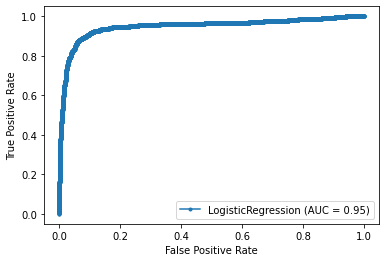

In [88]:
plot_roc_curve(LR_model,X =x_train, y= y_train,drop_intermediate=False, marker='.')

print ('The auc score for the LR model ', roc_auc_score(y_train,y_pred_lr_probs[:,1]))

The auc score for the LR model  0.9488764264182803


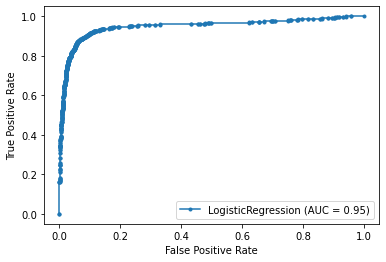

In [89]:
# same plot with drop_intermediate=True
plot_roc_curve(LR_model,X =x_train, y= y_train, marker='.') # drop_intermediate=True by default, some suboptimal thresholds are dropped 
print ('The auc score for the LR model ', roc_auc_score(y_train,y_pred_lr_probs[:,1]))

In [90]:
print(f"Train Accuracy: {LR_model.score(x_train,y_train):.3f}")
print(f"Test Accuracy: { LR_model.score(x_test,y_test):.3f}" )

Train Accuracy: 0.947
Test Accuracy: 0.945


In [91]:
# Getting confusion matrix, F-score on the train data

print(confusion_matrix(y_true = y_train, y_pred = y_pred_lr))  # y_pred_lr is LR_model.predict(x_train)

print ('The F1-SCORE on the train set prediction ', f1_score(y_true=y_train, y_pred = y_pred_lr))
print ('The F1-SCORE on the train set prediction ', f1_score(y_true=y_train, y_pred = y_pred_lr, sample_weight = y_train))

# INSIGHTS
# AUC score and accuracy are good, but poor F1 scores - maybe because of class imbalance in the dataset.

[[7147  107]
 [ 323  546]]
The F1-SCORE on the train set prediction  0.7174770039421814
The F1-SCORE on the train set prediction  0.771731448763251


In [92]:
# Getting confusion matrix, F-score on the test data

y_test_pred_lr = LR_model.predict(x_test)
print(confusion_matrix(y_true = y_test, y_pred = y_test_pred_lr))
print ('The F1-SCORE on the test set prediction ', f1_score(y_true=y_test, y_pred = y_test_pred_lr, sample_weight = y_test))

# INSIGHTS
# Test data also accuracy is good, but F1 scores are less

[[1780   34]
 [  77  140]]
The F1-SCORE on the test set prediction  0.7843137254901961


### Logistic Regression model with class_weight="balanced", as there is a class imbalance in the dataset

In [93]:
# we have only 10% of positive cases in the dataset, so using class_weight="balanced", default was class_weight=None

LR_model_balanced = LogisticRegression(max_iter=180, class_weight="balanced")

LR_model_balanced.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=180)

In [94]:
y_pred_lr = LR_model_balanced.predict(x_train)
print(y_pred_lr)

[0 0 0 ... 1 1 0]


#### Evaluating the performance of Logistic Regression model with class_weight="balanced"

In [95]:
# Getting confusion matrix, F1-score on the train data

print(confusion_matrix(y_true = y_train, y_pred = y_pred_lr))  # y_pred_lr is LR_model.predict(x_train)
print ('The F1-SCORE on the train set prediction ', f1_score(y_true=y_train, y_pred = y_pred_lr))
print ('The F1-SCORE on the train set prediction ', f1_score(y_true=y_train, y_pred = y_pred_lr, sample_weight = y_train))

[[6624  630]
 [  85  784]]
The F1-SCORE on the train set prediction  0.6868155935173018
The F1-SCORE on the train set prediction  0.9485783424077435


In [96]:
# Getting confusion matrix, F-score on the test data

y_test_pred_lr = LR_model_balanced.predict(x_test)
print(confusion_matrix(y_true = y_test, y_pred = y_test_pred_lr))
print ('The F1-SCORE on the test set prediction ', f1_score(y_true=y_test, y_pred = y_test_pred_lr, sample_weight = y_test))

# INSIGHTS
# F1-scores are improving when class_weight is balanced

[[1641  173]
 [  21  196]]
The F1-SCORE on the test set prediction  0.9491525423728813


In [97]:
print(f"Train Accuracy: {LR_model_balanced.score(x_train,y_train):.3f}")
print(f"Test Accuracy: { LR_model_balanced.score(x_test,y_test):.3f}" )

# INSIGHTS
# Accuracy have gone down slightly when class_weight is balanced

Train Accuracy: 0.912
Test Accuracy: 0.904


##### Plotting Area Under the ROC Curve for LR_model_balanced with train data

The auc score for the LR model with train data: 0.958884316989666


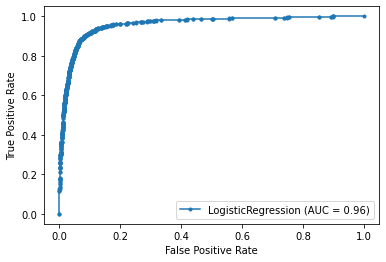

In [98]:
plot_roc_curve(LR_model_balanced,X =x_train, y= y_train, marker='.')
print ('The auc score for the LR model with train data:', roc_auc_score(y_train,LR_model_balanced.predict_proba(x_train)[:,1]))

# INSIGHTS
# AUC score is almost same as the previous model (class_weight=None)

##### Plotting Area Under the ROC Curve for LR_model_balanced with test data

The auc score for the LR model with test data: 0.9566505266259863


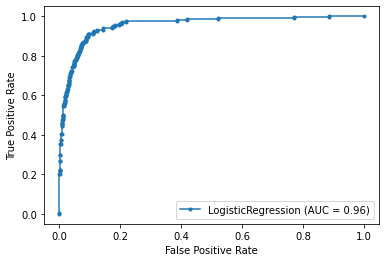

In [99]:
plot_roc_curve(LR_model_balanced,X =x_test, y= y_test, marker='.')
print ('The auc score for the LR model with test data:', roc_auc_score(y_test,LR_model_balanced.predict_proba(x_test)[:,1]))

# INSIGHTS
# Test AUC score is also almost same as train AUC score, no overfitting

##### Are we using the right threshold for classification?

In [100]:
# predicted class probability for testing dataset
pred_proba_df = pd.DataFrame(LR_model_balanced.predict_proba(x_test))
pred_proba_df  

,0,1
0,0.870403,0.129597
1,0.999713,0.000287
2,0.137318,0.862682
3,0.942082,0.057918
4,0.997912,0.002088
...,...,...
2026,0.922250,0.077750
2027,0.000487,0.999513
2028,0.663192,0.336808
2029,0.788133,0.211867


In [101]:
# sample thresholds to be used as classification decision boundary
threshold_list = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95]

for i in threshold_list:
    
    print ('\n******** For threshold = {} ******'.format(i))
    
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0) # applying lamdba fn to every element in df and returns the transformed df
    test_accuracy = accuracy_score(y_test,y_test_pred.iloc[:,1])
    
    print(confusion_matrix(y_true=y_test, y_pred = y_test_pred.iloc[:,1]))
    print('Our testing accuracy is {}'.format(round(test_accuracy,3)))
    print('The F1-SCORE on the test set prediction', round(f1_score(y_true=y_test, y_pred = y_test_pred.iloc[:,1], sample_weight = y_test),2))
    
# INSIGHTS
# default threshold used by Logistic Regression model is 0.5
# based on the business understanding, which metric/s are more important can be decided and threshold can be chosen accordingly.


******** For threshold = 0.15 ******
[[1280  534]
 [   5  212]]
Our testing accuracy is 0.735
The F1-SCORE on the test set prediction 0.99

******** For threshold = 0.2 ******
[[1384  430]
 [   5  212]]
Our testing accuracy is 0.786
The F1-SCORE on the test set prediction 0.99

******** For threshold = 0.25 ******
[[1455  359]
 [   8  209]]
Our testing accuracy is 0.819
The F1-SCORE on the test set prediction 0.98

******** For threshold = 0.3 ******
[[1496  318]
 [  12  205]]
Our testing accuracy is 0.838
The F1-SCORE on the test set prediction 0.97

******** For threshold = 0.35 ******
[[1539  275]
 [  13  204]]
Our testing accuracy is 0.858
The F1-SCORE on the test set prediction 0.97

******** For threshold = 0.4 ******
[[1583  231]
 [  15  202]]
Our testing accuracy is 0.879
The F1-SCORE on the test set prediction 0.96

******** For threshold = 0.45 ******
[[1615  199]
 [  18  199]]
Our testing accuracy is 0.893
The F1-SCORE on the test set prediction 0.96

******** For threshold

### Decision tree model

In [102]:
# Creating a decision tree classifier
clf_dt=DecisionTreeClassifier(class_weight="balanced") # max_features=None => all 76 columns are considered when looking for the best split
clf_dt.fit(x_train,y_train)
predicted_train = clf_dt.predict(x_train)

The score for the DT model  1.0
[[7254    0]
 [   0  869]]
The F1-SCORE on the train set prediction  1.0


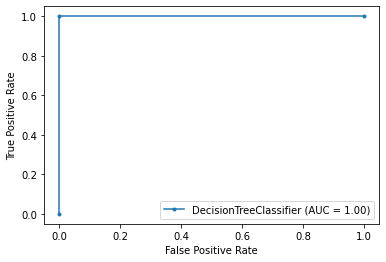

In [103]:
# Evaluating the train set for decision tree classifier
plot_roc_curve(clf_dt,X =x_train, y= y_train, marker='.')
print ('The score for the DT model ', roc_auc_score(y_train,predicted_train))
print(confusion_matrix(y_true = y_train, y_pred = predicted_train))
print ('The F1-SCORE on the train set prediction ',f1_score(y_true=y_train,y_pred = predicted_train,sample_weight = y_train))

[[1752   62]
 [  48  169]]
The F1-SCORE on the test set prediction  0.8756476683937823


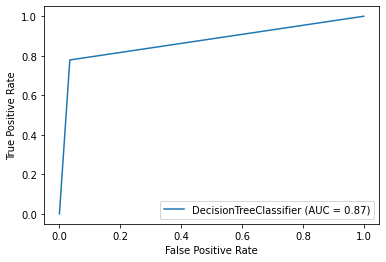

In [104]:
# Evaluating the test set
plot_roc_curve(clf_dt,X =x_test, y= y_test)
predicted_test = clf_dt.predict(x_test)
print (confusion_matrix(y_true = y_test, y_pred = predicted_test))
print ('The F1-SCORE on the test set prediction ',f1_score(y_true=y_test,y_pred = predicted_test,sample_weight = y_test))

# INSIGHTS
# Decision trees are prone to overfitting.

In [105]:
print(f"Train Accuracy: {clf_dt.score(x_train,y_train):.3f}")
print(f"Test Accuracy: { clf_dt.score(x_test,y_test):.3f}" )

#INSIGHTS
# There is overfitting of data, as train scores are very good and test scores are comparitively lesser.

Train Accuracy: 1.000
Test Accuracy: 0.946


#### Hyperparameter tuning of decision tree classifier

In [106]:
params={'criterion':['entropy','gini'],
        'max_depth':[11,12,13],
          'min_samples_leaf':[2,3,4,5],
       'min_samples_split':[5,6,7,8,9,10]}

# Fitting GridSearchCV to find the best combination of hyper parameters
# GridSearchCV produces the best combination of parameters, based on a scoring metric - f1 in this case
grid_search = GridSearchCV(estimator = clf_dt, param_grid = params, cv = 5, scoring = 'f1')
grid_search.fit(x_train, y_train)

print(grid_search.best_estimator_) # best combination of parameters
print(grid_search.best_score_) # best F1-score

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=13, min_samples_leaf=2, min_samples_split=7)
0.752004766787525


In [107]:
# Fitting on the training dataset 
clf_dt = grid_search.best_estimator_
clf_dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=13, min_samples_leaf=2, min_samples_split=7)

The score for the DT model  1.0
[[7254    0]
 [   0  869]]
The F1-SCORE on the train set prediction  1.0


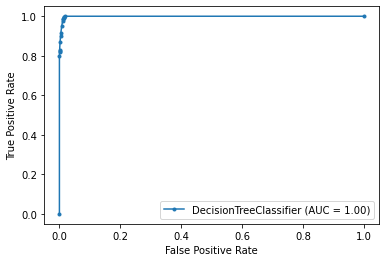

In [108]:
# Evaluating the train set for decision tree classifier

plot_roc_curve(clf_dt,X =x_train, y= y_train, marker='.')
print ('The score for the DT model ', roc_auc_score(y_train,predicted_train))
print(confusion_matrix(y_true                        = y_train, y_pred = predicted_train))
print ('The F1-SCORE on the train set prediction ',f1_score(y_true=y_train,y_pred = predicted_train,sample_weight = y_train))

[[1716   98]
 [  30  187]]
The F1-SCORE on the test set prediction  0.9257425742574258


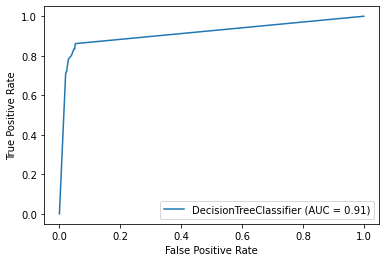

In [109]:
# Evaluating the test set for decision tree classifier
plot_roc_curve(clf_dt,X =x_test, y= y_test)
predicted_test = clf_dt.predict(x_test)
print (confusion_matrix(y_true = y_test, y_pred = predicted_test))
print ('The F1-SCORE on the test set prediction ',f1_score(y_true=y_test,y_pred = predicted_test,sample_weight = y_test))

In [110]:
print(f"Train Accuracy: {clf_dt.score(x_train,y_train):.3f}")
print(f"Test Accuracy: { clf_dt.score(x_test,y_test):.3f}" )

#INSIGHTS
# There is less overfitting now after hyperparameter tuning
# Test AUC score has also improved after hyperparameter tuning

Train Accuracy: 0.984
Test Accuracy: 0.937


In [111]:
# Looking at the feature importances 
importances = clf_dt.feature_importances_  # Gini importance for each feature
columns = list(x_train.columns)
importances_dict = {columns[i]: importances[i] for i in range(len(columns))}

In [112]:
# sorted function returns a list containing all items (as each tuple in the list) from the importances_dict in the descending order
sorted(importances_dict.items(), key=lambda importances_dict: importances_dict[1],reverse=True)

[('Online Purchase Amount', 0.2616114427278233),
 ('Investment Tax Saving Bond', 0.167699868207184),
 ('Investment in Commudity', 0.16114762888802933),
 ('Life Insurance', 0.08222060036672148),
 ('Average Credit Card Transaction', 0.0635546464889445),
 ('Average A/C Balance', 0.05021296277536975),
 ('Personal Loan', 0.04963342557125202),
 ('Term Deposit', 0.04202112558853888),
 ('Investment in Derivative', 0.01978670435247343),
 ('Medical Insurance', 0.018532308556699774),
 ('Investment in Mutual Fund', 0.014636506733963394),
 ('Balance Transfer', 0.013605620575442259),
 ('Investment in Equity', 0.010581931739390968),
 ('Home Loan', 0.00877898215086983),
 ('year_last_moved', 0.007492214574500698),
 ('Portfolio Balance', 0.006021988795870965),
 ('region_Unknown', 0.0032688260456289384),
 ('occupation_Manual Worker', 0.0022617415337134925),
 ('occupation_Professional', 0.0017900570941886491),
 ('chidren_3+', 0.0016434329945947995),
 ('occupation_Secretarial/Admin', 0.0012809651790555308)

### Trying with a Random Forest model

In [113]:
# Fitting a Random Forest model

start = time.time() # just to see how much time GridSearchCV is taking
 
clf = RandomForestClassifier()
params={'n_estimators':[100,200,500,600],
        'class_weight':['balanced'], 
        'criterion':['entropy','gini'],
         'max_features' : ["auto", "sqrt", "log2"],
        'max_depth':[3,4,5,6]}

# Fitting grid search cv to find the best combination of hyper parameters 
grid_search = GridSearchCV(estimator = clf,param_grid = params,cv = 5,scoring = 'f1')
grid_search.fit(x_train, y_train)

end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

print(grid_search.best_estimator_) # best combination of hyper parameters 
print(grid_search.best_score_) # best F!-score

best_params = grid_search.best_estimator_

Time taken in grid search:  1231.27
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6)
0.6538944099624372


The score for the RF model  0.9296797639998946
[[6551  703]
 [  38  831]]
The F1-SCORE on the train set prediction  0.9776470588235294


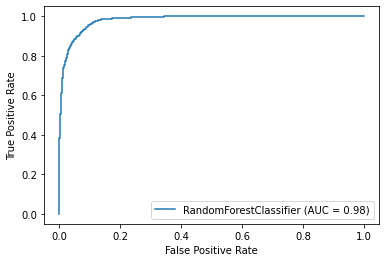

In [114]:
clf = best_params
clf.fit(x_train, y_train)

# Evaluating on the train set
predicted_train = clf.predict(x_train)
plot_roc_curve(clf,X =x_train, y= y_train)

print ('The score for the RF model ', roc_auc_score(y_train,predicted_train))
print(confusion_matrix(y_true = y_train, y_pred = predicted_train))
print ('The F1-SCORE on the train set prediction ',f1_score(y_true=y_train, y_pred = predicted_train,sample_weight = y_train))

[[1597  217]
 [  17  200]]
The F1-SCORE on the test set prediction 0.959


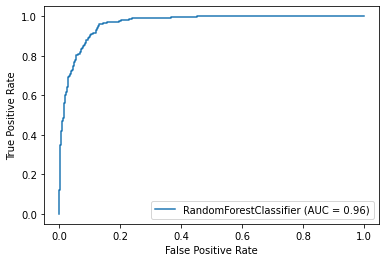

In [115]:
# Evaluating on the test set
plot_roc_curve(clf,X =x_test, y= y_test)
predicted_test = clf.predict(x_test)

print (confusion_matrix(y_true = y_test, y_pred = predicted_test))
print ('The F1-SCORE on the test set prediction', 
       round(f1_score(y_true=y_test,y_pred = predicted_test,sample_weight = y_test),3))

In [116]:
print(f"Train Accuracy: {clf.score(x_train,y_train):.3f}")
print(f"Test Accuracy: { clf.score(x_test,y_test):.3f}" )

Train Accuracy: 0.909
Test Accuracy: 0.885


In [117]:
# Looking at the feature importances 
importances = clf.feature_importances_  # Gini importance for each feature
importances_dict = {columns[i]: importances[i] for i in range(len(columns))}

# sorted function returns a list containing all items from the importances_dict in the descending order
importances_dict = dict(sorted(importances_dict.items(), key=lambda importances_dict: importances_dict[1],reverse=True))
importances_dict

{'Online Purchase Amount': 0.25139526900603426,
 'Investment in Equity': 0.1304109743187519,
 'Investment in Commudity': 0.09637944142304315,
 'Investment Tax Saving Bond': 0.08837329709819823,
 'Average Credit Card Transaction': 0.08281991204173872,
 'Portfolio Balance': 0.06721351170508386,
 'Life Insurance': 0.06614327893883937,
 'Investment in Derivative': 0.04540029481119734,
 'Personal Loan': 0.034167879799188325,
 'Investment in Mutual Fund': 0.021131360134839735,
 'Term Deposit': 0.020853647774855773,
 'Balance Transfer': 0.01822908447706254,
 'Average A/C Balance': 0.014914371635303502,
 'Medical Insurance': 0.01381010030207758,
 'Home Loan': 0.008240845708046837,
 'year_last_moved': 0.00639015454866689,
 'region_North West': 0.0014938480313022523,
 'income_<27,500, >=25,000': 0.0011931995553541015,
 'gender_Male': 0.001053202991607428,
 'occupation_Other': 0.0010329937725120017,
 'income_>=35,000': 0.0009479018925148872,
 'self_employed_Yes': 0.0009083961155807351,
 'occupati

## Model Comparison

|metrics | Logistic Regression | Decision Tree | Random Forest |
| --- | --- | --- | --- |
| Test Accuracy | 0.904 | 0.937 | 0.885 |
| Test AUC | 0.96 | 0.91 | 0.96 |
| F1-SCORE | 0.95 | 0.925 | 0.96 |

In [ ]:
# based on the business understanding, which metric/s are more important can be decided and model (and parameters) 
# can be chosen accordingly.